In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.feature_selection import SelectKBest, f_regression
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#Outlier - Standard scaler - persisted

In [3]:
# Load the data
usedCarData = pd.read_csv('used_car_prices_dataset_final.csv')

# Understanding the data

In [4]:
usedCarData.columns

Index(['CarAge', 'Mileage', 'Brand', 'FuelType', 'Transmission', 'OwnerCount',
       'EngineSize', 'Horsepower', 'CarCondition', 'ResalePrice'],
      dtype='object')

In [5]:
usedCarData.dtypes

CarAge            int64
Mileage         float64
Brand            object
FuelType         object
Transmission     object
OwnerCount      float64
EngineSize      float64
Horsepower      float64
CarCondition     object
ResalePrice     float64
dtype: object

In [6]:
usedCarData.shape

(4666, 10)

In [7]:
usedCarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CarAge        4666 non-null   int64  
 1   Mileage       4666 non-null   float64
 2   Brand         4666 non-null   object 
 3   FuelType      4666 non-null   object 
 4   Transmission  4666 non-null   object 
 5   OwnerCount    4533 non-null   float64
 6   EngineSize    4666 non-null   float64
 7   Horsepower    4666 non-null   float64
 8   CarCondition  4666 non-null   object 
 9   ResalePrice   4666 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 364.7+ KB


In [8]:
usedCarData.describe()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
count,4666.00,4666.00,4533.00,4666.00,4666.00,4666.00
mean,10.27,51426.43,2.48,2.04,149.85,52181.77
std,5.94,24202.42,1.14,0.58,39.99,12106.95
min,1.00,-26733.11,1.00,-0.24,-28.62,-599.85
25%,5.00,36405.52,1.00,1.67,122.89,44039.24
50%,10.00,49959.17,2.00,2.02,149.58,52222.64
75%,15.00,64324.46,4.00,2.36,176.63,60278.03
max,30.00,150000.00,4.00,5.00,291.70,94400.29


In [9]:
# Row Duplication
usedCarData.duplicated().sum()

np.int64(0)

In [10]:
usedCarData.isnull().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [11]:
usedCarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CarAge        4666 non-null   int64  
 1   Mileage       4666 non-null   float64
 2   Brand         4666 non-null   object 
 3   FuelType      4666 non-null   object 
 4   Transmission  4666 non-null   object 
 5   OwnerCount    4533 non-null   float64
 6   EngineSize    4666 non-null   float64
 7   Horsepower    4666 non-null   float64
 8   CarCondition  4666 non-null   object 
 9   ResalePrice   4666 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 364.7+ KB


In [12]:
usedCarData['Brand'].unique()

array(['Honda', 'Ford', 'Kia', 'Mercedes', 'Audi', 'Nissan', 'Toyota',
       'BMW', 'Hyundai'], dtype=object)

## Categorical data
#Brand - array(['Honda', 'Ford', 'Kia', 'Mercedes', 'Audi', 'Nissan', 'Toyota','BMW', 'Hyundai'], dtype=object)

#FuelType -  array(['Electric', 'Hybrid', 'Petrol', 'Diesel'], dtype=object)

#Transmission - array(['Manual', 'Automatic'], dtype=object)

#CarCondition - array(['Poor', 'Fair', 'Good', 'Excellent'], dtype=object)


In [13]:
num_col = usedCarData.select_dtypes(include='number').columns

CarAge


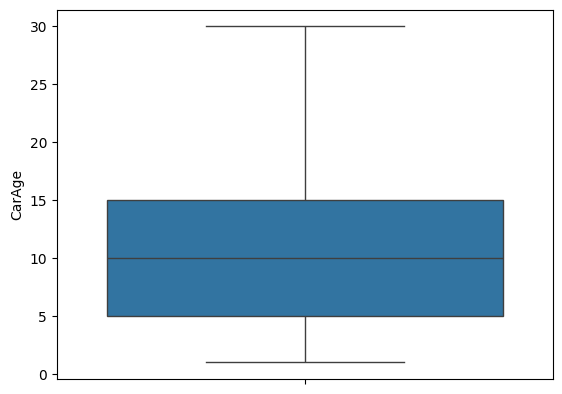

Mileage


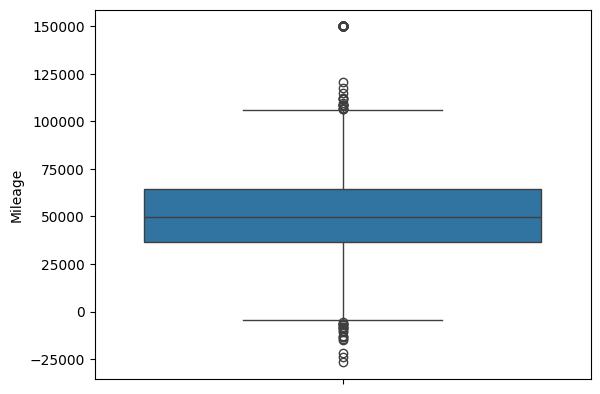

OwnerCount


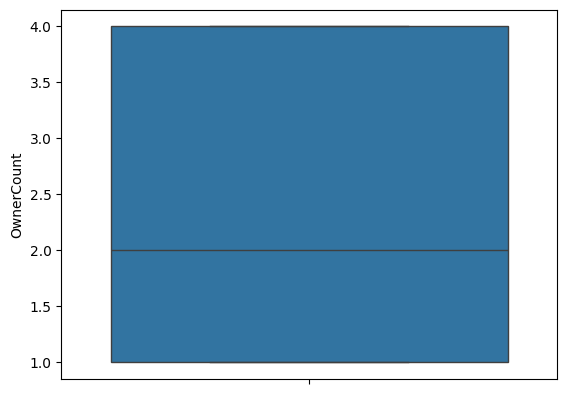

EngineSize


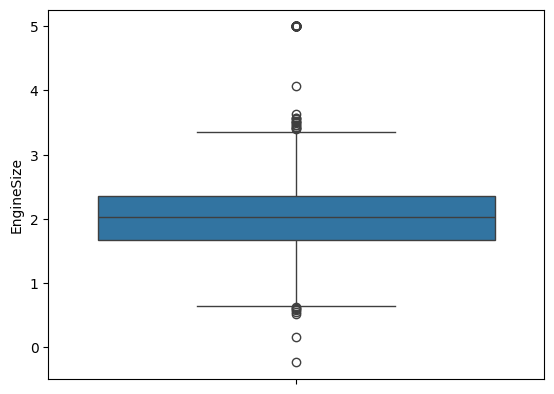

Horsepower


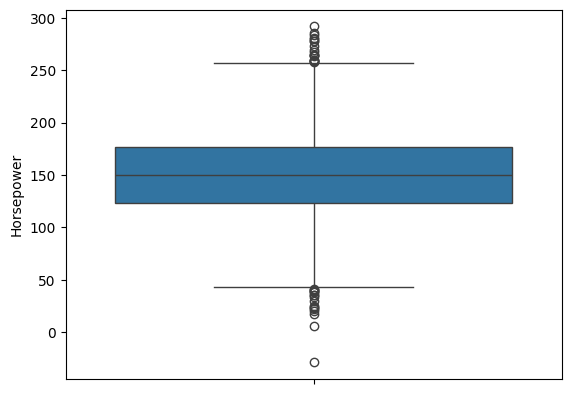

ResalePrice


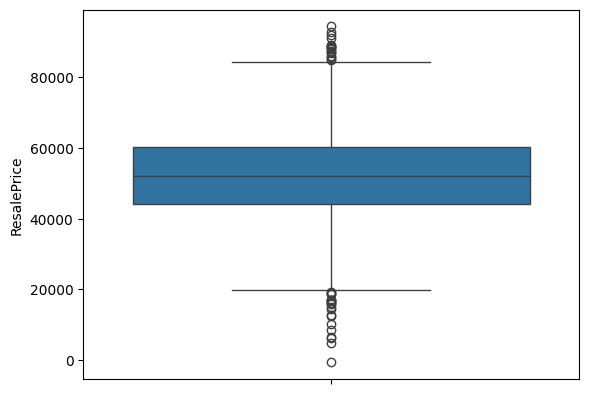

In [14]:
for col in num_col:
    print(col)
    sns.boxplot(usedCarData[col])
    plt.show()

In [15]:
usedCarData.head()

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,Fair,57287.51


In [16]:
usedCarData[num_col].corr()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
CarAge,1.00,0.06,0.03,0.03,0.01,-0.48
Mileage,0.06,1.00,0.01,0.06,-0.00,-0.21
OwnerCount,0.03,0.01,1.00,-0.01,0.02,0.01
EngineSize,0.03,0.06,-0.01,1.00,-0.01,0.20
Horsepower,0.01,-0.00,0.02,-0.01,1.00,0.65
ResalePrice,-0.48,-0.21,0.01,0.20,0.65,1.00


<Axes: >

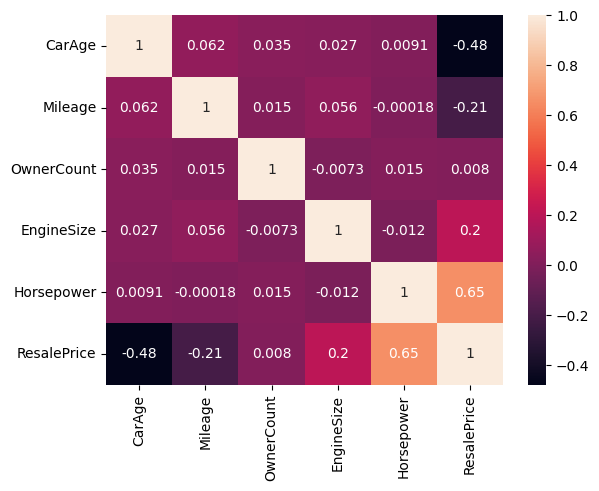

In [17]:
sns.heatmap(usedCarData[num_col].corr(), annot = True)

In [18]:
# EDA

CarAge


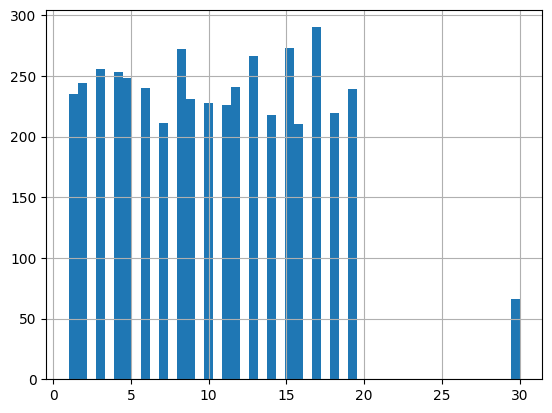

Mileage


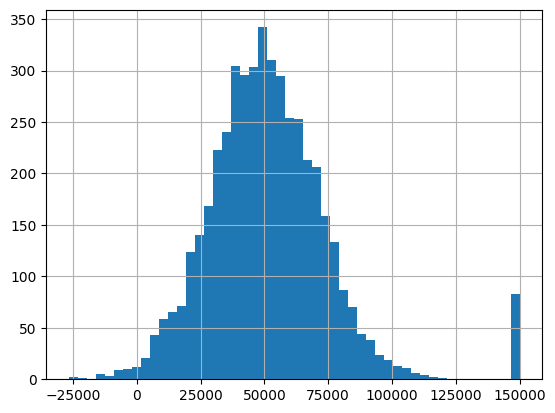

OwnerCount


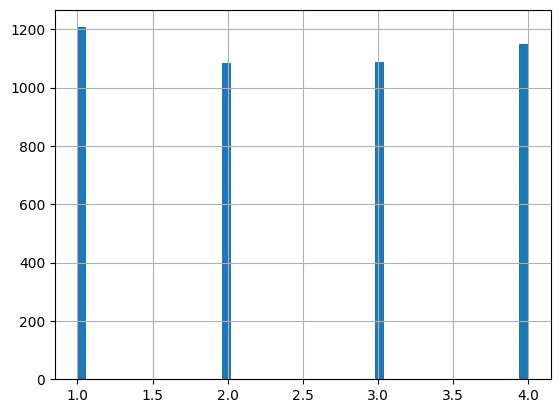

EngineSize


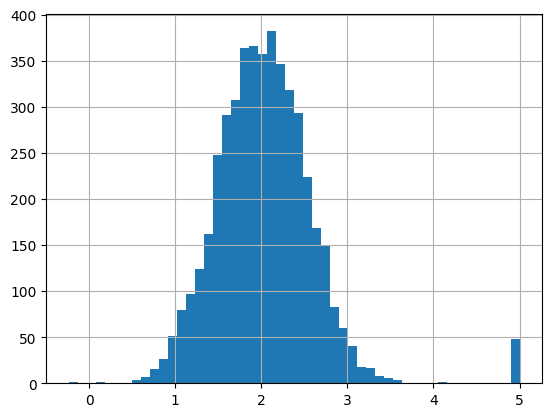

Horsepower


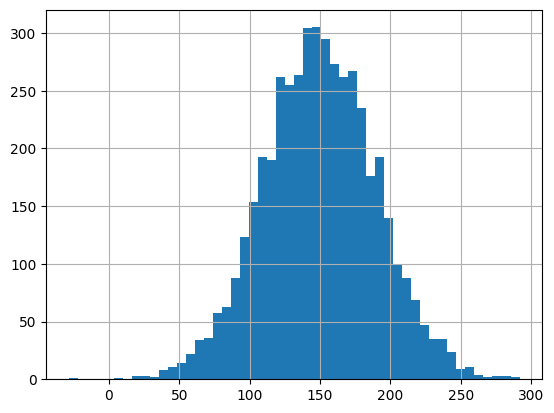

ResalePrice


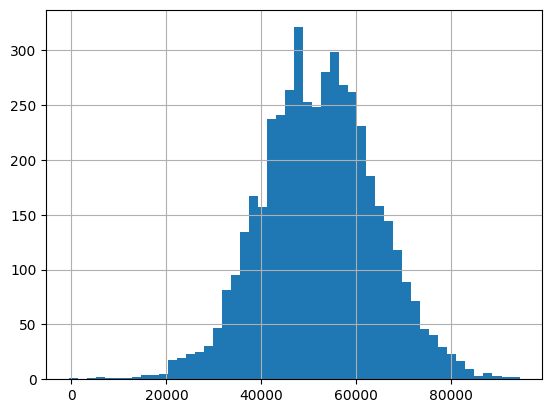

In [19]:
#usedCarData['Mileage'].hist(bins = 50)
num_col_1 = usedCarData.select_dtypes(include='number').columns

for col in num_col_1:
    print(col)
    usedCarData[col].hist(bins = 50)    
    plt.show()

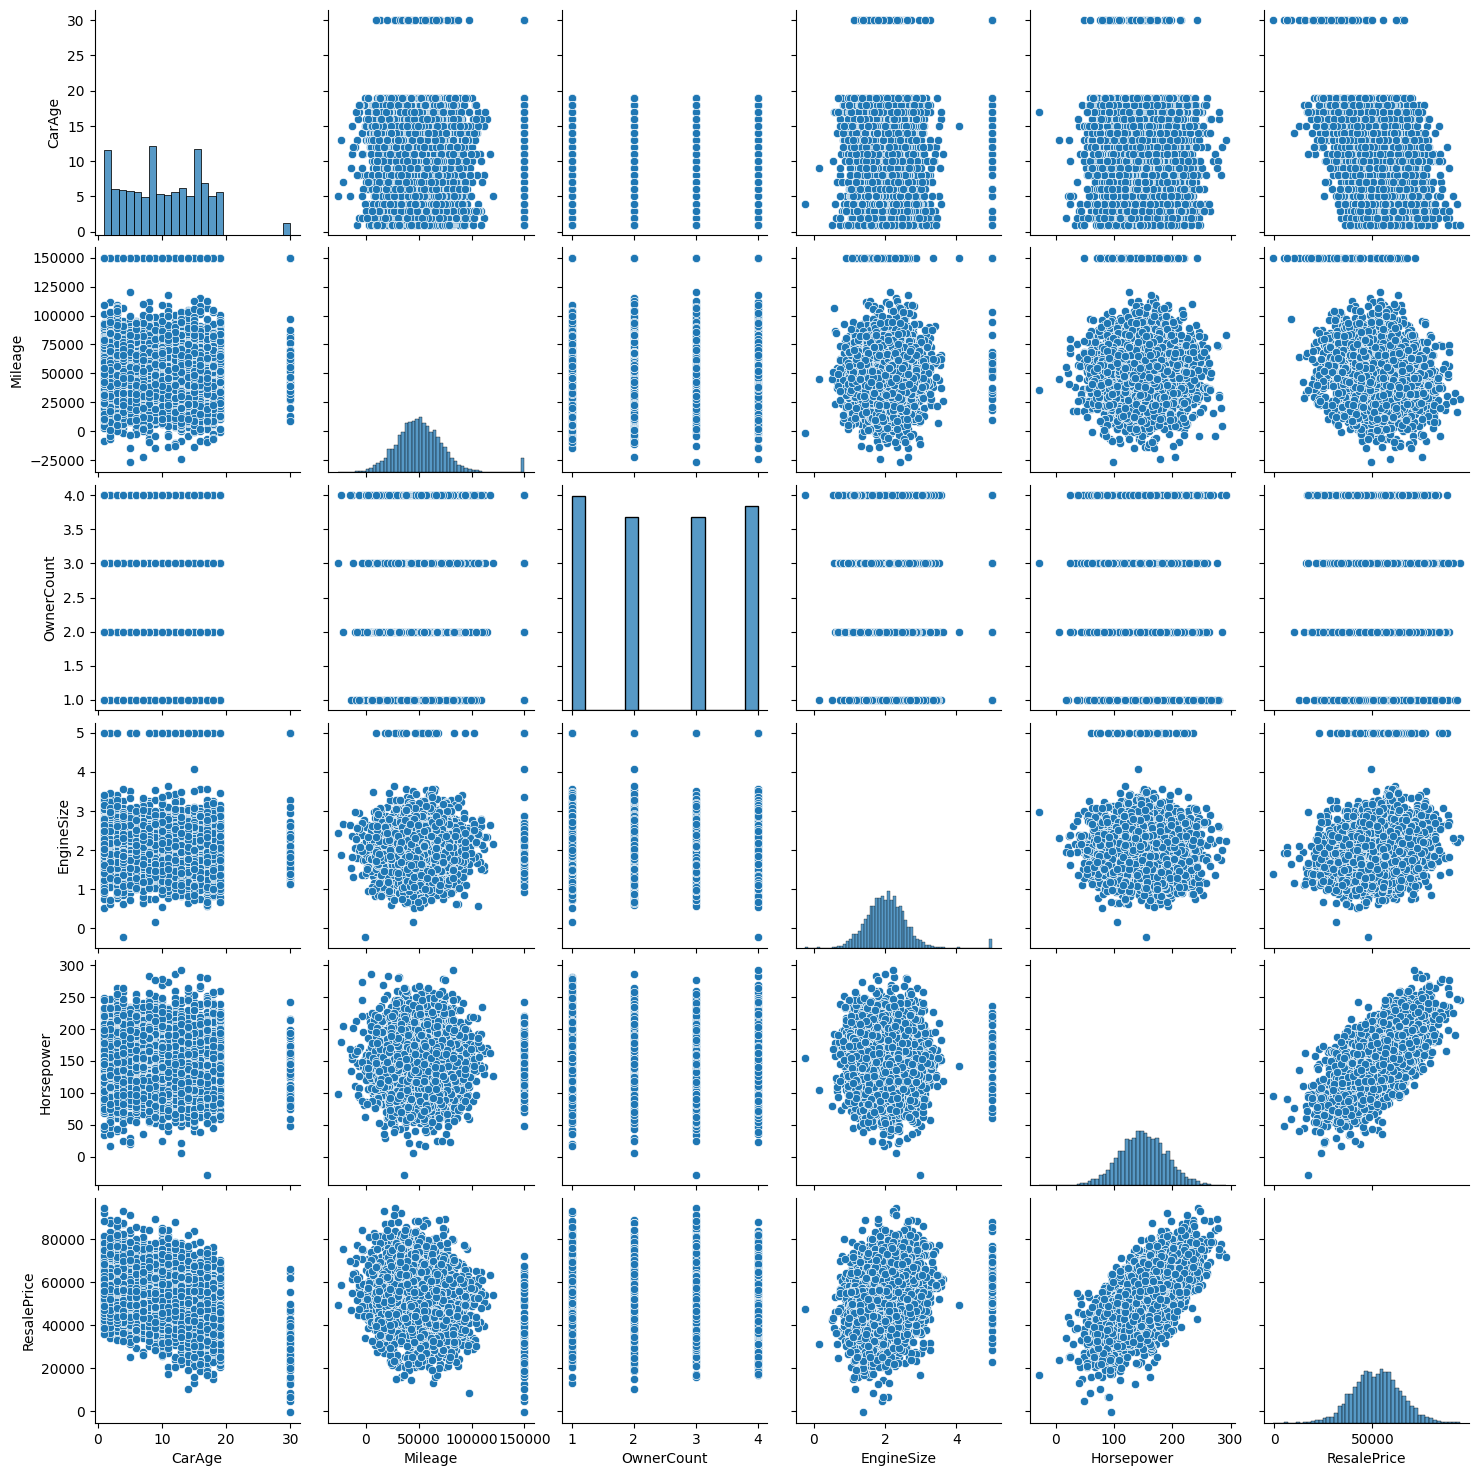

In [20]:
#Bivariate
sns.pairplot(usedCarData[num_col_1])

In [21]:
usedCarData['CarAge'].value_counts()

CarAge
17    290
15    273
8     272
13    266
3     256
4     253
5     248
2     244
12    241
6     240
19    239
1     235
9     231
10    228
11    226
18    219
14    218
7     211
16    210
30     66
Name: count, dtype: int64

In [22]:
usedCarData.groupby('Mileage').ResalePrice.mean()

Mileage
-26733.11   49262.04
-23767.31   58765.61
-22021.70   75456.90
-14830.28   69656.38
-14420.33   46995.11
              ...   
112353.62   54140.43
114861.86   48820.12
117547.66   63292.56
120581.10   54029.40
150000.00   38565.19
Name: ResalePrice, Length: 4584, dtype: float64

In [23]:
usedCarData.groupby(['Mileage','CarAge','OwnerCount','EngineSize','Horsepower']).ResalePrice.mean().to_csv('result.csv')

# Pre-Processing

In [24]:
usedCarData.isna().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [25]:
usedCarData.groupby('OwnerCount').count()

,CarAge,Mileage,Brand,FuelType,Transmission,EngineSize,Horsepower,CarCondition,ResalePrice
OwnerCount,,,,,,,,,
1.00,1207,1207,1207,1207,1207,1207,1207,1207,1207
2.00,1086,1086,1086,1086,1086,1086,1086,1086,1086
3.00,1089,1089,1089,1089,1089,1089,1089,1089,1089
4.00,1151,1151,1151,1151,1151,1151,1151,1151,1151


In [26]:
usedCarData.shape

(4666, 10)

1. Impute the Bedrooms with mode
2. Impute the Bathrooms with respect to Bedrooms 
3. Drop the rows with null HasGarage

In [27]:
#usedCarData[usedCarData['OwnerCount'].isnull()]
usedCarData['OwnerCount'].mode()[0]

np.float64(1.0)

In [28]:
usedCarData['OwnerCount'].fillna(usedCarData['OwnerCount'].mode()[0], inplace = True)

C:\Users\Dharshan Vinai Nanda\AppData\Local\Temp\ipykernel_12304\3356966143.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  usedCarData['OwnerCount'].fillna(usedCarData['OwnerCount'].mode()[0], inplace = True)


1
1
1
2
2
2
3
3
3

Mode = 1,2,3 

Mean  = can be only one
Median  = can be only one
Mode = can be one or more than one

Mean = may or may not be inside the data
Median = May or may not be inside the data
Mode = Will be inside the data


1,2,3,4,5 = 3
1,2,3,4  = 2.5


In [29]:
usedCarData.isna().sum()

CarAge          0
Mileage         0
Brand           0
FuelType        0
Transmission    0
OwnerCount      0
EngineSize      0
Horsepower      0
CarCondition    0
ResalePrice     0
dtype: int64

In [30]:
usedCarData[usedCarData['Mileage']>130000]

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
37,8,150000.00,Kia,Petrol,Automatic,2.00,2.49,119.01,Poor,40525.58
74,17,150000.00,Nissan,Electric,Manual,2.00,2.73,182.45,Good,52703.23
149,5,150000.00,Nissan,Petrol,Manual,4.00,1.13,126.08,Poor,50469.66
186,30,150000.00,Mercedes,Diesel,Manual,1.00,2.06,242.42,Fair,42626.82
261,3,150000.00,BMW,Diesel,Automatic,3.00,5.00,71.11,Poor,52718.75
...,...,...,...,...,...,...,...,...,...,...
4405,14,150000.00,Kia,Diesel,Automatic,3.00,2.55,209.41,Good,58824.06
4442,8,150000.00,BMW,Petrol,Manual,1.00,5.00,112.15,Fair,43503.34
4517,5,150000.00,Honda,Electric,Manual,2.00,2.42,176.56,Excellent,57268.13
4554,1,150000.00,BMW,Petrol,Automatic,3.00,2.29,191.60,Good,58749.16


In [31]:
usedCarDataNew  = usedCarData[usedCarData['Mileage']<130000]

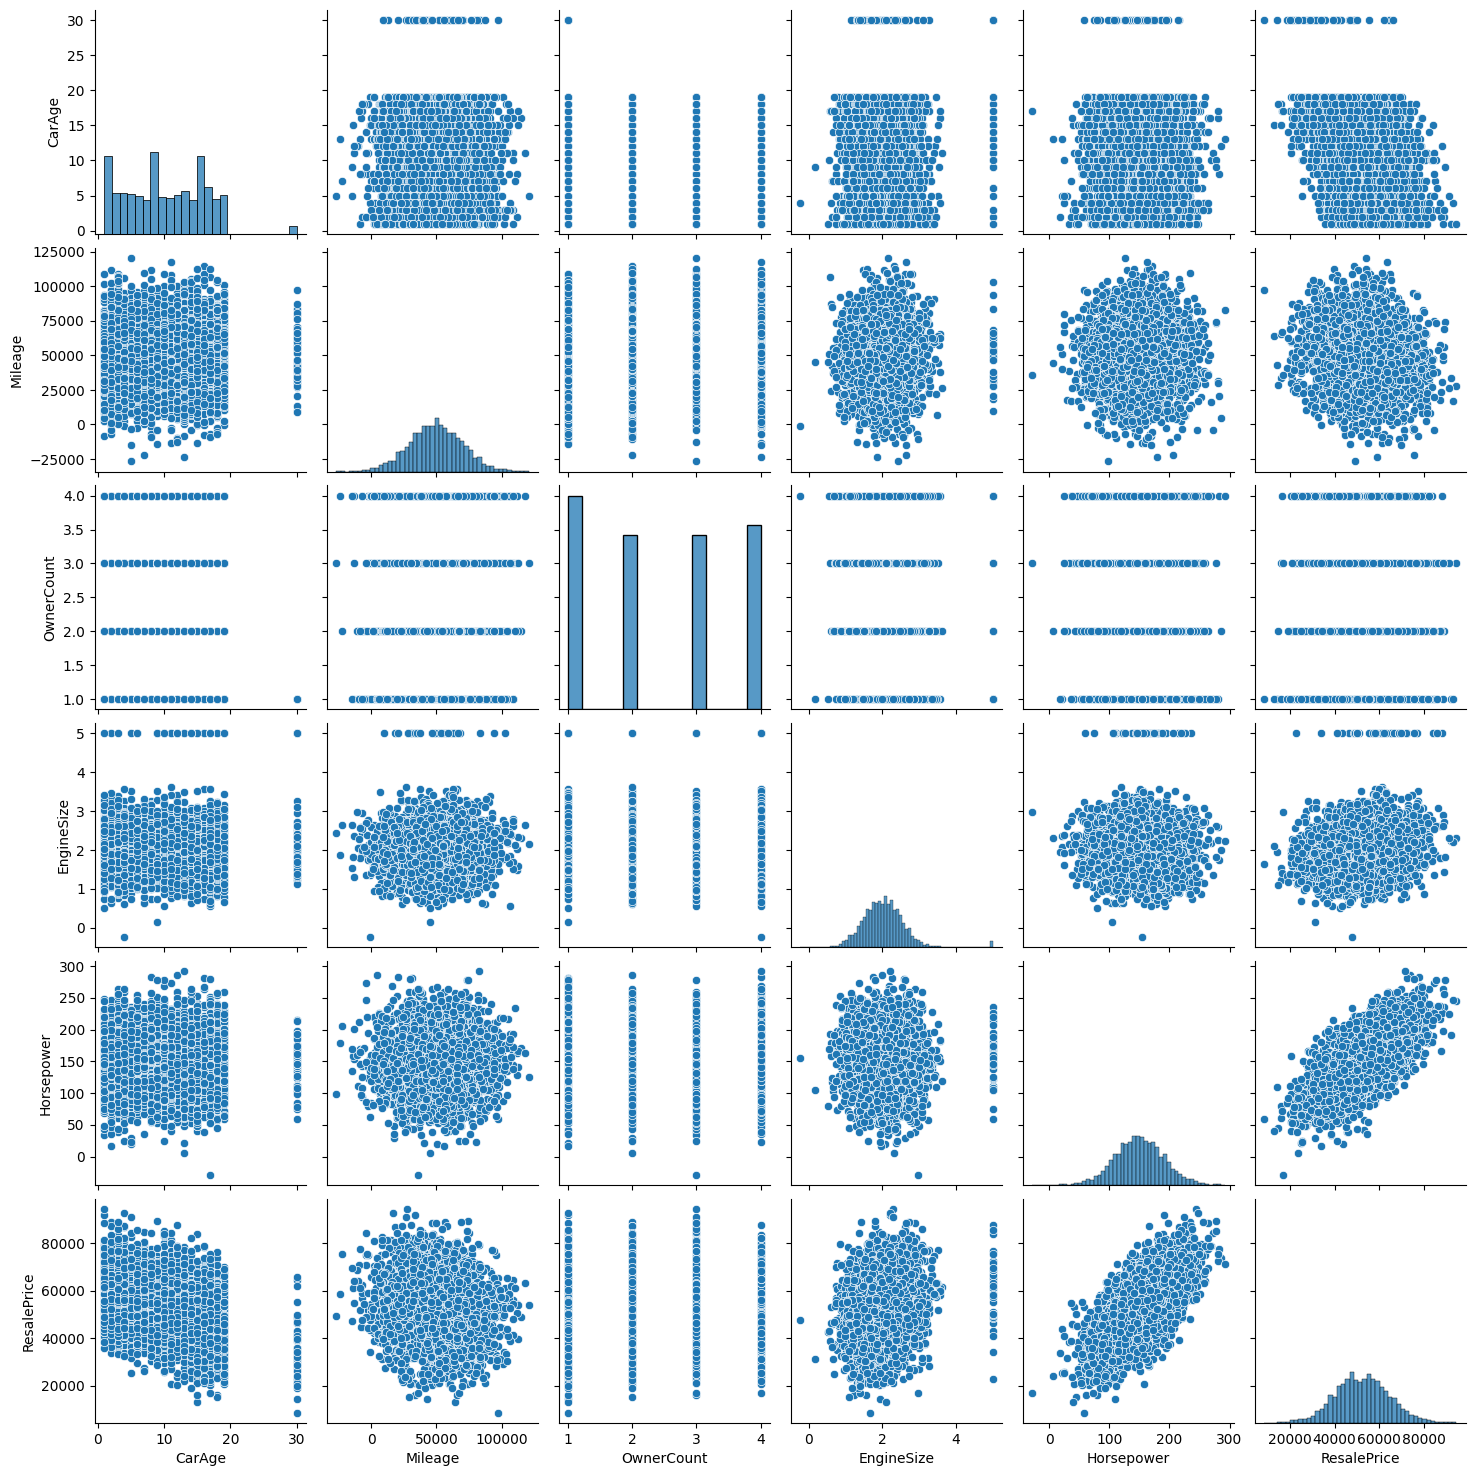

In [32]:
sns.pairplot(usedCarDataNew)

In [33]:
usedCarDataNew[num_col].corr()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
CarAge,1.00,0.01,-0.02,0.02,0.01,-0.46
Mileage,0.01,1.00,0.00,0.01,0.02,-0.16
OwnerCount,-0.02,0.00,1.00,-0.02,0.02,0.03
EngineSize,0.02,0.01,-0.02,1.00,-0.01,0.22
Horsepower,0.01,0.02,0.02,-0.01,1.00,0.66
ResalePrice,-0.46,-0.16,0.03,0.22,0.66,1.00


In [34]:
usedCarDataNew

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,Fair,57287.51
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,Audi,Hybrid,Manual,2.00,1.84,170.18,Fair,56808.96
4662,4,66193.15,Hyundai,Diesel,Automatic,4.00,1.84,162.18,Poor,56224.63
4663,1,54614.23,Ford,Electric,Automatic,2.00,2.48,178.08,Excellent,68440.02
4664,7,52035.77,Toyota,Hybrid,Manual,4.00,1.63,191.21,Excellent,64847.89


In [35]:
num_col = usedCarDataNew.select_dtypes(include = 'number').columns

## Categorical data
#Brand - array(['Honda', 'Ford', 'Kia', 'Mercedes', 'Audi', 'Nissan', 'Toyota','BMW', 'Hyundai'], dtype=object)

#FuelType -  array(['Electric', 'Hybrid', 'Petrol', 'Diesel'], dtype=object)

#Transmission - array(['Manual', 'Automatic'], dtype=object)

#CarCondition - array(['Poor', 'Fair', 'Good', 'Excellent'], dtype=object)


In [36]:
usedCarDataNew['Transmission'].value_counts()

Transmission
Manual       2322
Automatic    2261
Name: count, dtype: int64

In [37]:
mapping = {'Manual':1, 'Automatic':2}

In [38]:
usedCarDataNew['Transmission'] = usedCarDataNew['Transmission'].map(mapping)

C:\Users\Dharshan Vinai Nanda\AppData\Local\Temp\ipykernel_12304\3578694747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedCarDataNew['Transmission'] = usedCarDataNew['Transmission'].map(mapping)


In [39]:
usedCarDataNew.head()

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,1,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,2,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,1,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,2,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,2,4.00,2.42,196.91,Fair,57287.51


In [40]:
usedCarDataNew['FuelType'].value_counts()

FuelType
Diesel      1204
Hybrid      1156
Electric    1124
Petrol      1099
Name: count, dtype: int64

In [41]:
usedCarDataNew.head()

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,1,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,2,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,1,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,2,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,2,4.00,2.42,196.91,Fair,57287.51


In [42]:
#OneHot Encoding for Brand
usedCarDataNew = pd.get_dummies(usedCarDataNew, columns=['Brand'],dtype='int' )

In [43]:
#OneHot Encoding
usedCarDataNew = pd.get_dummies(usedCarDataNew, columns=['CarCondition'],dtype='int' )

In [44]:
#OneHot Encoding
usedCarDataNew = pd.get_dummies(usedCarDataNew, columns=['FuelType'],dtype='int' )


In [45]:
usedCarDataNew

,CarAge,Mileage,Transmission,OwnerCount,EngineSize,Horsepower,ResalePrice,Brand_Audi,Brand_BMW,Brand_Ford,...,Brand_Nissan,Brand_Toyota,CarCondition_Excellent,CarCondition_Fair,CarCondition_Good,CarCondition_Poor,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol
0,15,70539.73,1,3.00,1.86,116.78,37380.23,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,11,72118.01,2,4.00,2.46,150.06,58279.18,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,8,38721.05,1,2.00,1.67,140.58,52420.52,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,7,33675.66,2,3.00,2.80,157.02,54195.80,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,19,51562.86,2,4.00,2.42,196.91,57287.51,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,1,2.00,1.84,170.18,56808.96,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4662,4,66193.15,2,4.00,1.84,162.18,56224.63,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4663,1,54614.23,2,2.00,2.48,178.08,68440.02,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4664,7,52035.77,1,4.00,1.63,191.21,64847.89,0,0,0,...,0,1,1,0,0,0,0,0,1,0


# Scaling

In [46]:
scaling = StandardScaler()

In [47]:
y=usedCarDataNew['ResalePrice']

In [48]:
X = usedCarDataNew.drop(columns='ResalePrice')

In [49]:
X.columns

Index(['CarAge', 'Mileage', 'Transmission', 'OwnerCount', 'EngineSize',
       'Horsepower', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes', 'Brand_Nissan',
       'Brand_Toyota', 'CarCondition_Excellent', 'CarCondition_Fair',
       'CarCondition_Good', 'CarCondition_Poor', 'FuelType_Diesel',
       'FuelType_Electric', 'FuelType_Hybrid', 'FuelType_Petrol'],
      dtype='object')

In [50]:
scaled_features = X.columns

In [51]:
usedCarDataNew[scaled_features] = scaling.fit_transform(usedCarDataNew[scaled_features])

In [52]:
usedCarDataNew.corr()

,CarAge,Mileage,Transmission,OwnerCount,EngineSize,Horsepower,ResalePrice,Brand_Audi,Brand_BMW,Brand_Ford,...,Brand_Nissan,Brand_Toyota,CarCondition_Excellent,CarCondition_Fair,CarCondition_Good,CarCondition_Poor,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol
CarAge,1.00,0.01,0.01,-0.02,0.02,0.01,-0.46,-0.01,-0.02,0.01,...,0.01,0.01,0.02,-0.02,0.03,-0.03,0.00,-0.02,0.00,0.01
Mileage,0.01,1.00,-0.00,0.00,0.01,0.02,-0.16,-0.00,-0.02,0.01,...,-0.01,-0.01,0.02,-0.02,0.01,0.00,-0.01,0.02,-0.02,0.01
Transmission,0.01,-0.00,1.00,0.01,0.01,-0.00,0.01,-0.00,0.01,-0.00,...,-0.00,-0.01,0.02,-0.01,-0.01,0.00,-0.00,-0.01,-0.00,0.01
OwnerCount,-0.02,0.00,0.01,1.00,-0.02,0.02,0.03,0.01,0.01,-0.01,...,0.01,-0.01,0.03,-0.02,0.00,-0.00,-0.02,0.00,0.01,0.01
EngineSize,0.02,0.01,0.01,-0.02,1.00,-0.01,0.22,0.01,-0.01,-0.01,...,0.02,-0.01,0.02,-0.01,-0.01,-0.00,0.01,0.01,0.00,-0.02
Horsepower,0.01,0.02,-0.00,0.02,-0.01,1.00,0.66,0.01,0.01,0.01,...,-0.02,-0.01,0.00,0.02,-0.01,-0.01,-0.01,-0.01,-0.00,0.01
ResalePrice,-0.46,-0.16,0.01,0.03,0.22,0.66,1.00,0.02,0.02,0.00,...,-0.01,-0.02,0.12,-0.05,0.00,-0.07,0.00,0.00,-0.00,-0.01
Brand_Audi,-0.01,-0.00,-0.00,0.01,0.01,0.01,0.02,1.00,-0.13,-0.13,...,-0.12,-0.13,0.01,-0.01,0.02,-0.02,-0.02,-0.01,0.02,0.00
Brand_BMW,-0.02,-0.02,0.01,0.01,-0.01,0.01,0.02,-0.13,1.00,-0.13,...,-0.12,-0.13,-0.01,0.02,-0.01,0.01,-0.01,0.02,-0.00,-0.00
Brand_Ford,0.01,0.01,-0.00,-0.01,-0.01,0.01,0.00,-0.13,-0.13,1.00,...,-0.12,-0.13,-0.03,0.03,0.01,-0.01,0.01,-0.01,0.01,-0.00


In [53]:
X = usedCarDataNew.drop(columns = 'ResalePrice')
y = usedCarDataNew['ResalePrice']

# Data Split

In [54]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=31)

# Model

In [55]:
model = LinearRegression()

In [56]:
model.fit(train_X, train_y)

LinearRegression()

In [57]:
model.coef_

array([-5.59347199e+03, -1.95151389e+03,  1.09251904e+02,  9.78791162e+01,
        2.79787153e+03,  7.91509755e+03,  1.51262137e+16,  1.52819852e+16,
        1.54604296e+16,  1.49544255e+16,  1.52303549e+16,  1.52303549e+16,
        1.51784321e+16,  1.47929567e+16,  1.52432898e+16,  1.03744341e+17,
        1.03686168e+17,  1.02032077e+17,  1.02371398e+17, -9.09087542e+15,
       -8.88703322e+15, -8.97086531e+15, -8.81934408e+15])

<Axes: >

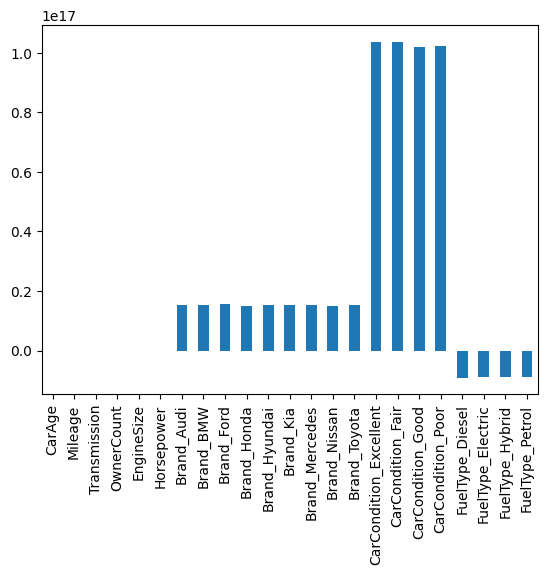

In [58]:
pd.Series(model.coef_, index = X.columns).plot(kind = 'bar')

In [59]:
model.intercept_

np.float64(52522.55432424462)

# Prediction

In [60]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

# Evaluation

In [61]:
def evaluate(actual, pred, source):
    print(source)
    print("MSE")
    print(mean_squared_error(actual, pred))
    print("RMSE")
    print(np.sqrt(mean_squared_error(actual, pred)))
    print("MAPE")
    print(mean_absolute_percentage_error(actual, pred)) 
    print("R2 score")
    print(r2_score(actual, pred)) 
    return [mean_squared_error(actual, pred), np.sqrt(mean_squared_error(actual, pred)), r2_score(actual, pred), mean_absolute_percentage_error(actual, pred)]

In [62]:
train_result = evaluate(train_y, train_pred, 'TRAIN DATA RESULT')
test_result = evaluate(test_y, test_pred, 'TEST DATA RESULT')

TRAIN DATA RESULT
MSE
34032837.461961284
RMSE
5833.767004428723
MAPE
0.09433649962395994
R2 score
0.7565639645153216
TEST DATA RESULT
MSE
33632053.83448998
RMSE
5799.314945275
MAPE
0.09690506753954671
R2 score
0.7655907796814766


In [63]:
train_result

[np.float64(34032837.461961284),
 np.float64(5833.767004428723),
 0.7565639645153216,
 np.float64(0.09433649962395994)]

In [64]:
test_result

[np.float64(33632053.83448998),
 np.float64(5799.314945275),
 0.7655907796814766,
 np.float64(0.09690506753954671)]

In [65]:
res = [train_result] + [test_result]

In [66]:
res

[[np.float64(34032837.461961284),
  np.float64(5833.767004428723),
  0.7565639645153216,
  np.float64(0.09433649962395994)],
 [np.float64(33632053.83448998),
  np.float64(5799.314945275),
  0.7655907796814766,
  np.float64(0.09690506753954671)]]

In [67]:
pd.DataFrame(res, columns=['MSE','RMSE','MAPE','R2 Score'], index = ['Train', 'Test'])

,MSE,RMSE,MAPE,R2 Score
Train,34032837.46,5833.77,0.76,0.09
Test,33632053.83,5799.31,0.77,0.10


In [68]:
X.shape

(4583, 23)

# Feature Selection

In [69]:
select_k_best = SelectKBest(f_regression, k= 4 )

In [70]:
X_select = select_k_best.fit_transform(X,y)

In [71]:
select_k_best.get_support()

array([ True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [72]:
X.columns

Index(['CarAge', 'Mileage', 'Transmission', 'OwnerCount', 'EngineSize',
       'Horsepower', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes', 'Brand_Nissan',
       'Brand_Toyota', 'CarCondition_Excellent', 'CarCondition_Fair',
       'CarCondition_Good', 'CarCondition_Poor', 'FuelType_Diesel',
       'FuelType_Electric', 'FuelType_Hybrid', 'FuelType_Petrol'],
      dtype='object')

In [73]:
selected_feature_names = X.columns[select_k_best.get_support()]

In [74]:
selected_feature_names

Index(['CarAge', 'Mileage', 'EngineSize', 'Horsepower'], dtype='object')

# Model After Feature Selection

In [75]:
X = X[selected_feature_names]

In [76]:
X = X[selected_feature_names]
y = usedCarDataNew['ResalePrice']

# Data Split

In [77]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=31)

# Model

In [78]:
train_X.shape

(3208, 4)

In [79]:
model = LinearRegression()

In [80]:
model.fit(train_X, train_y)

LinearRegression()

In [81]:
model.coef_

array([-5573.09619715, -1962.79498928,  2825.57263201,  7964.71933195])

<Axes: >

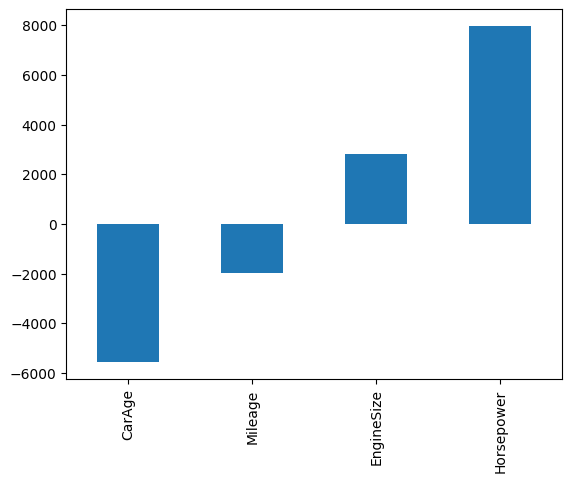

In [82]:
pd.Series(model.coef_, index = X.columns).plot(kind = 'bar')

In [83]:
model.intercept_

np.float64(52508.687231676406)

# Prediction

In [84]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

# Evaluation

In [85]:
def evaluate(actual, pred, source):
    print(source)
    print("MSE")
    print(mean_squared_error(actual, pred))
    print("RMSE")
    print(np.sqrt(mean_squared_error(actual, pred)))
    print("MAPE")
    print(mean_absolute_percentage_error(actual, pred)) 
    print("R2 score")
    print(r2_score(actual, pred)) 
    return [mean_squared_error(actual, pred), np.sqrt(mean_squared_error(actual, pred)), r2_score(actual, pred), mean_absolute_percentage_error(actual, pred)]

In [86]:
train_result = evaluate(train_y, train_pred, 'TRAIN DATA RESULT')
test_result = evaluate(test_y, test_pred, 'TEST DATA RESULT')

TRAIN DATA RESULT
MSE
36935816.59903986
RMSE
6077.484397268318
MAPE
0.09782994903379857
R2 score
0.7357990273273773
TEST DATA RESULT
MSE
36448249.2316515
RMSE
6037.238543543853
MAPE
0.10046892333487271
R2 score
0.7459624164967025


In [87]:
train_result

[np.float64(36935816.59903986),
 np.float64(6077.484397268318),
 0.7357990273273773,
 np.float64(0.09782994903379857)]

In [88]:
test_result

[np.float64(36448249.2316515),
 np.float64(6037.238543543853),
 0.7459624164967025,
 np.float64(0.10046892333487271)]

In [89]:
res = [train_result] + [test_result]

In [90]:
res

[[np.float64(36935816.59903986),
  np.float64(6077.484397268318),
  0.7357990273273773,
  np.float64(0.09782994903379857)],
 [np.float64(36448249.2316515),
  np.float64(6037.238543543853),
  0.7459624164967025,
  np.float64(0.10046892333487271)]]

In [91]:
pd.DataFrame(res, columns=['MSE','RMSE','R2 Score','MAPE'], index = ['Train', 'Test'])

,MSE,RMSE,R2 Score,MAPE
Train,36935816.60,6077.48,0.74,0.10
Test,36448249.23,6037.24,0.75,0.10


## As the R2 Score for Test and Train data are around 74% and same so we can come to conclusion that May be the model would work